## EDA - Airbnb NYC 2019

### Import appropriate libraries and read the data into a data frame

In [5]:
!pip install jovian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6479 sha256=43b740cfb161bd4dfe7ec792699bd9c5c2069856aed7c395199f4756e2ce8196
  Stored in directory: /Users/0s/Library/Caches/pip/wheels/cb/ba/bc/7ae4822f65dea25d41ebe0cf219cd7ddfd0987634750ee41b3
Successfully built uuid


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jovian
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

In [7]:
df = pd.read_csv("/Users/0s/Downloads/AB_NYC_2019.csv")
df.head

<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

### Data understanding

In [8]:
df.shape

(48895, 16)

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Observations:

- Dataset contains 48895 rows and 16 columns.
- 3 columns are of float type, 7 columns of int type, and 6 columns of object type.
- Average price of rentals in NYC is $153, average number of nights spent is 7 days, and average availability of an Airbnb is 112 days.
- There are some listings which appear to be free.
- Few customers are also exists who have rented for almost 3 years.
- There are rentals which are available for all times of the year too.
- Outliers are also present in columns: minimum_nights, number_of_reviews, reviews_per_month and calculated_host_listings_count columns.

### Data Quality inspection

In [12]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- There are around 10,000 null values in last_review and reviews_per_month columns.
- There are around 20 null values in host_id and host_name columns.

In [13]:
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

- There are 5 neighbourhood groups, 221 locations and 3 room types.

In [15]:
df.duplicated().sum()

0

- There are no duplicate rows in the dataset.

### Data cleaning

In [16]:
# Replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace = True)

In [17]:
df.host_name.mode()

0    Michael
Name: host_name, dtype: object

In [18]:
df.name.mode()

0    Hillside Hotel
Name: name, dtype: object

In [19]:
# Replacing all NaN values in 'host_name' with mode value of the column
df['host_name'].fillna('Michael', inplace=True)

In [20]:
# Replacing all NaN values in 'name' with mode value of the column
df['name'].fillna('Hillside Hotel', inplace=True)

In [21]:
# Creating a new category for NaN values
# Replacing all NaN values in 'last_review' with string 'Unavailable'
df['last_review'].fillna('Unavailable', inplace=True)

### Bivariate analysis

<Axes: >

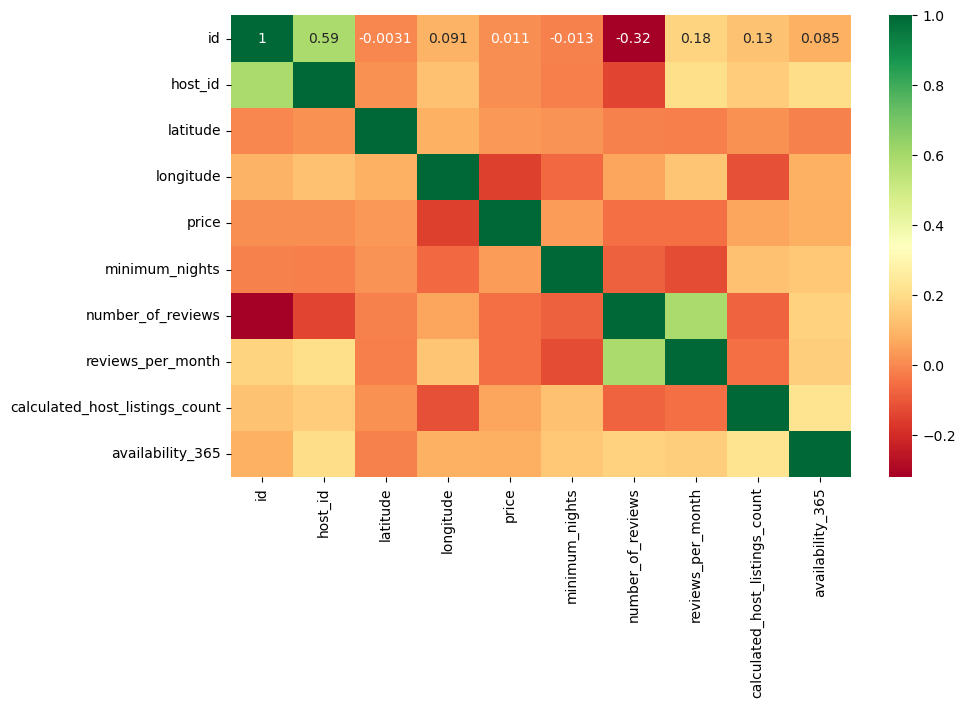

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)

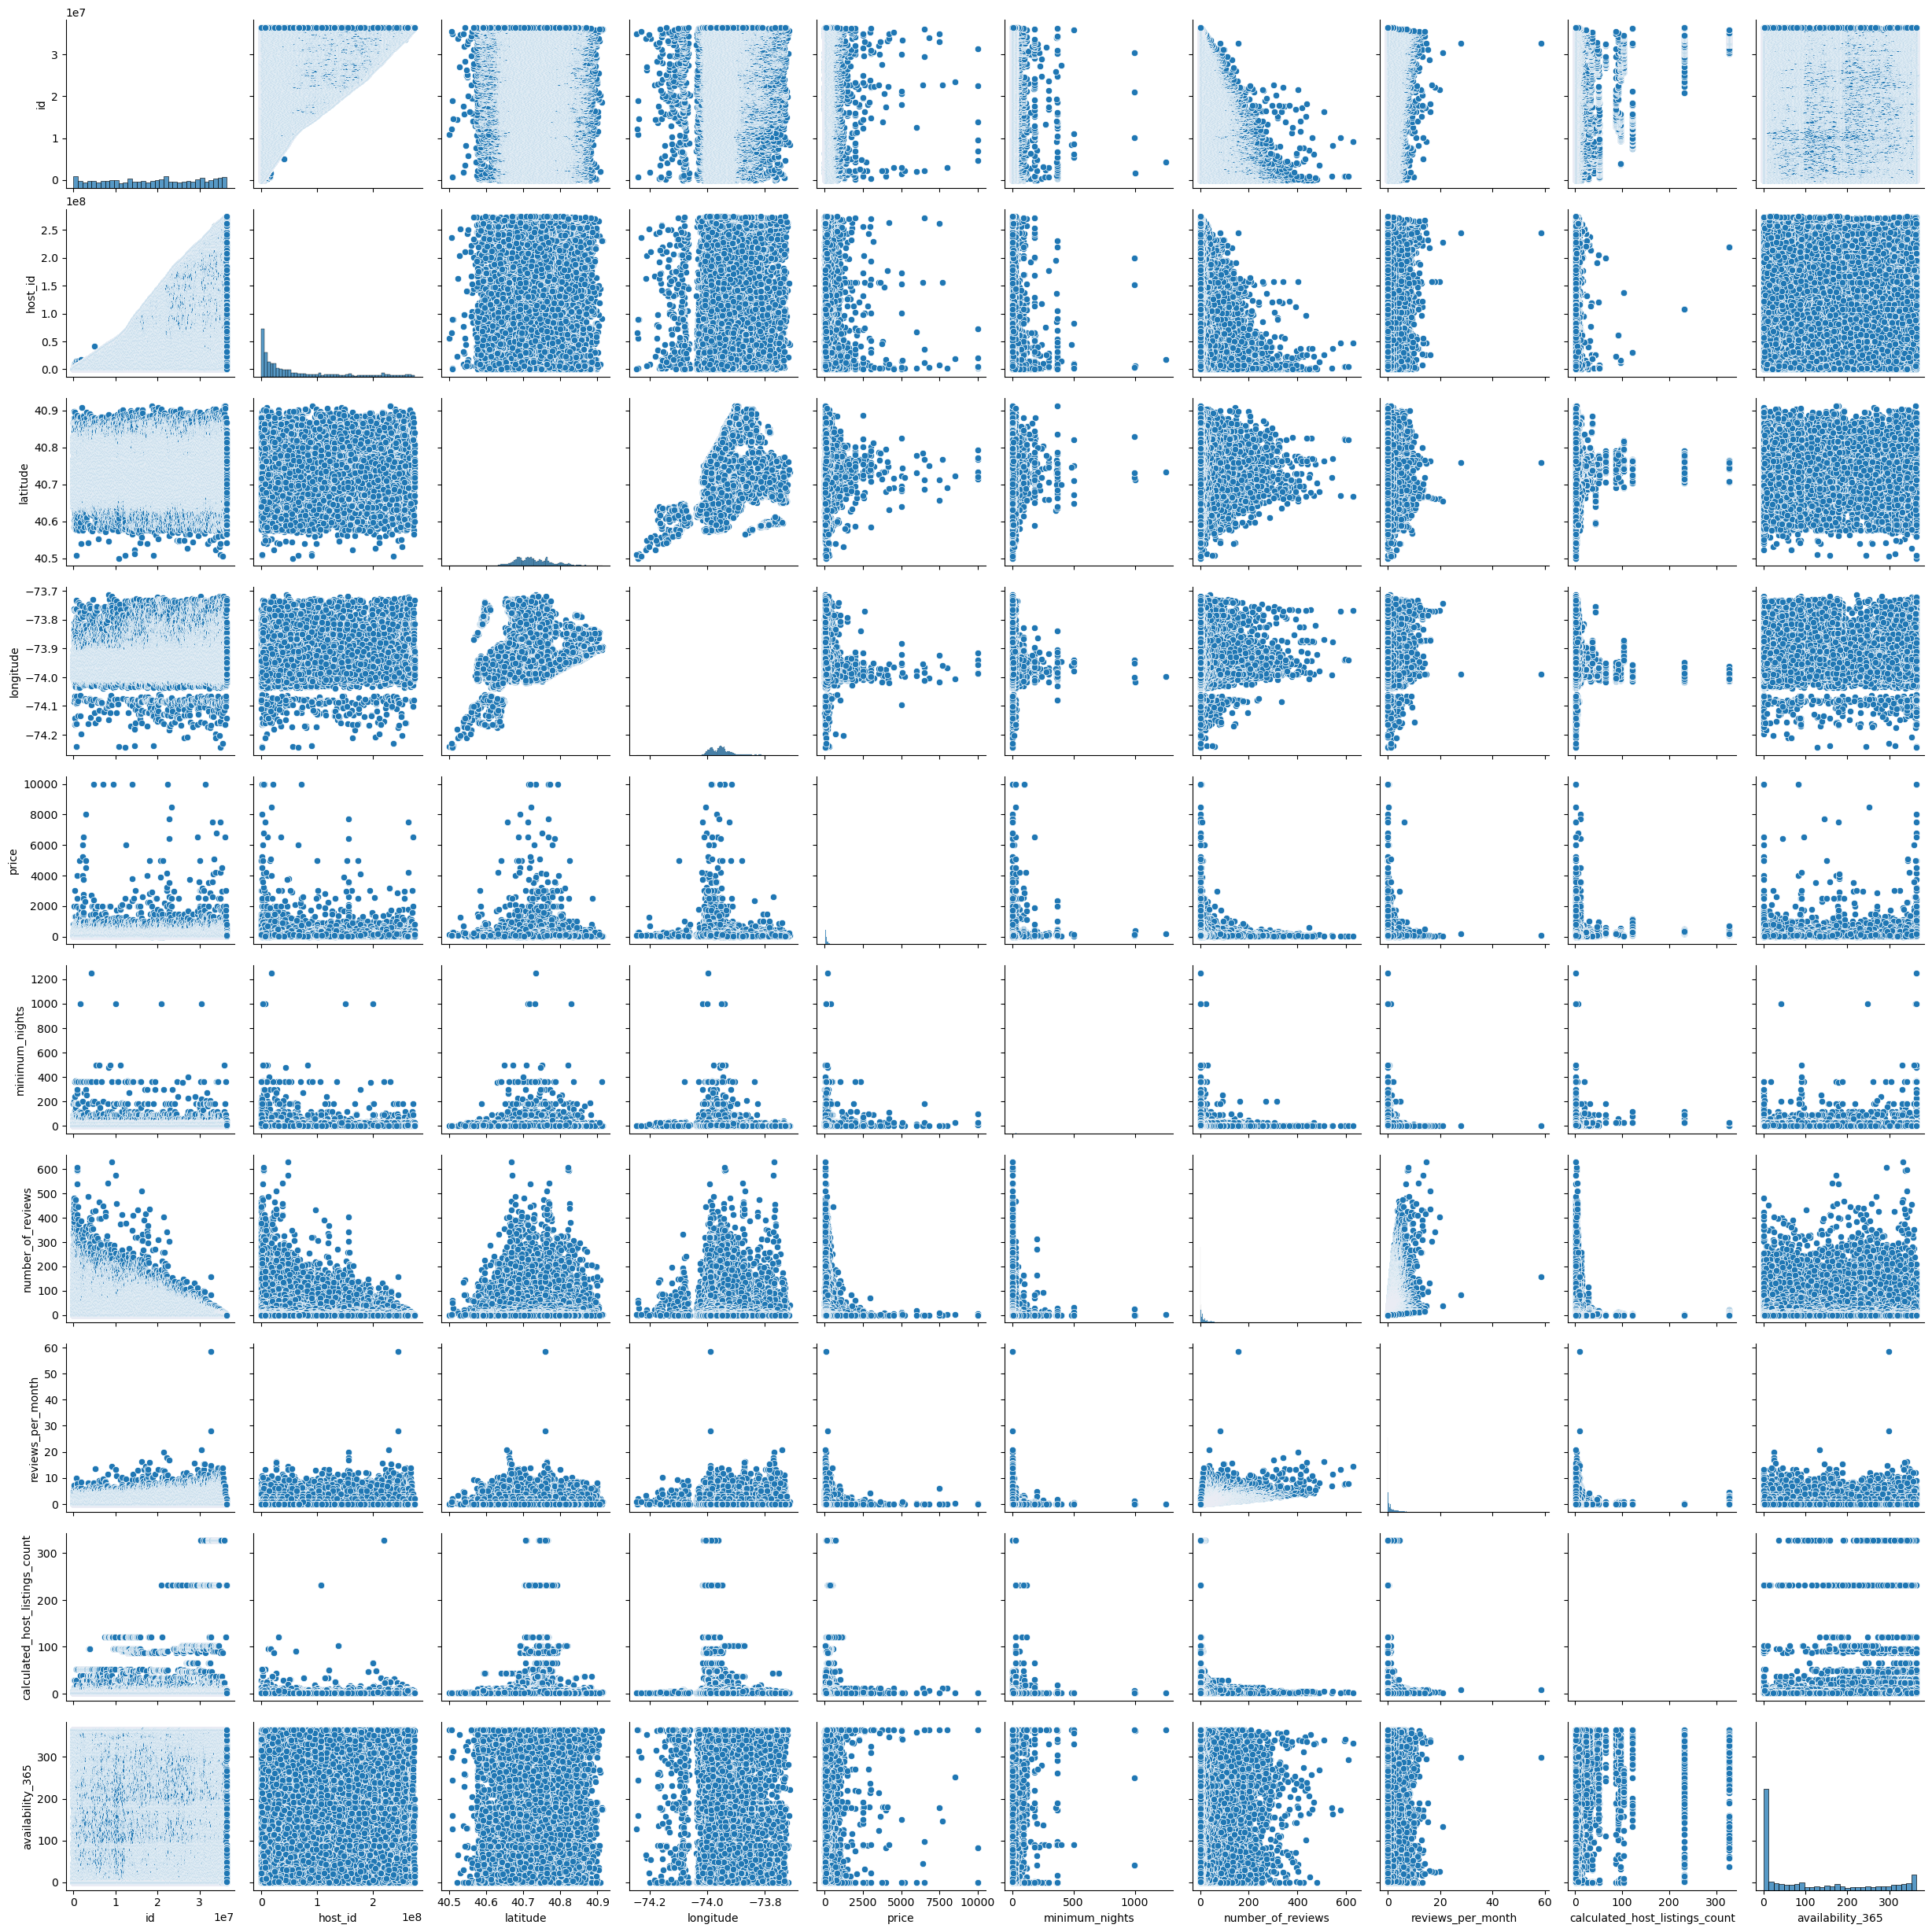

In [23]:
sns.pairplot(df)

- There are no significant correlations between columns in the dataset.

### Export cleaned data frame to a CSV file

In [24]:
df.shape

(48895, 16)

In [25]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
df.to_csv('AB_NYC_2019_cleaned.csv')